In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('career_prediction_dataset.csv')

In [2]:
# --- Basic Inspection ---
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,interest_programming,interest_data_analysis,interest_system_architecture,interest_hardware,interest_visual_design,workstyle_focus,workstyle_collaboration,workstyle_pace,workstyle_problem_type,skill_abstract_problem_solving,...,skill_visual_design,skill_leadership,motivator_primary_driver,motivator_risk_tolerance,pref_learning_style,pref_project_type,pref_core_focus,pref_user_proximity,pref_patience_for_impact,career
0,5,2,4,1,2,1,3,5,4,4,...,1,3,2,4,2,3,4,3,3,Software Engineer
1,5,2,4,1,3,2,3,3,5,5,...,1,2,1,3,2,3,5,1,3,Software Engineer
2,5,2,4,1,3,2,4,5,5,5,...,1,2,1,3,3,2,5,3,5,Software Engineer
3,4,2,3,1,2,2,2,4,5,4,...,2,2,1,3,2,1,5,2,3,Software Engineer
4,5,1,4,2,1,3,4,5,5,5,...,2,2,1,4,3,1,4,1,5,Software Engineer


In [3]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8900 entries, 0 to 8899
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   interest_programming              8900 non-null   int64 
 1   interest_data_analysis            8900 non-null   int64 
 2   interest_system_architecture      8900 non-null   int64 
 3   interest_hardware                 8900 non-null   int64 
 4   interest_visual_design            8900 non-null   int64 
 5   workstyle_focus                   8900 non-null   int64 
 6   workstyle_collaboration           8900 non-null   int64 
 7   workstyle_pace                    8900 non-null   int64 
 8   workstyle_problem_type            8900 non-null   int64 
 9   skill_abstract_problem_solving    8900 non-null   int64 
 10  skill_math_quantitative           8900 non-null   int64 
 11  skill_communication_storytelling  8900 non-null   int64 
 12  skill

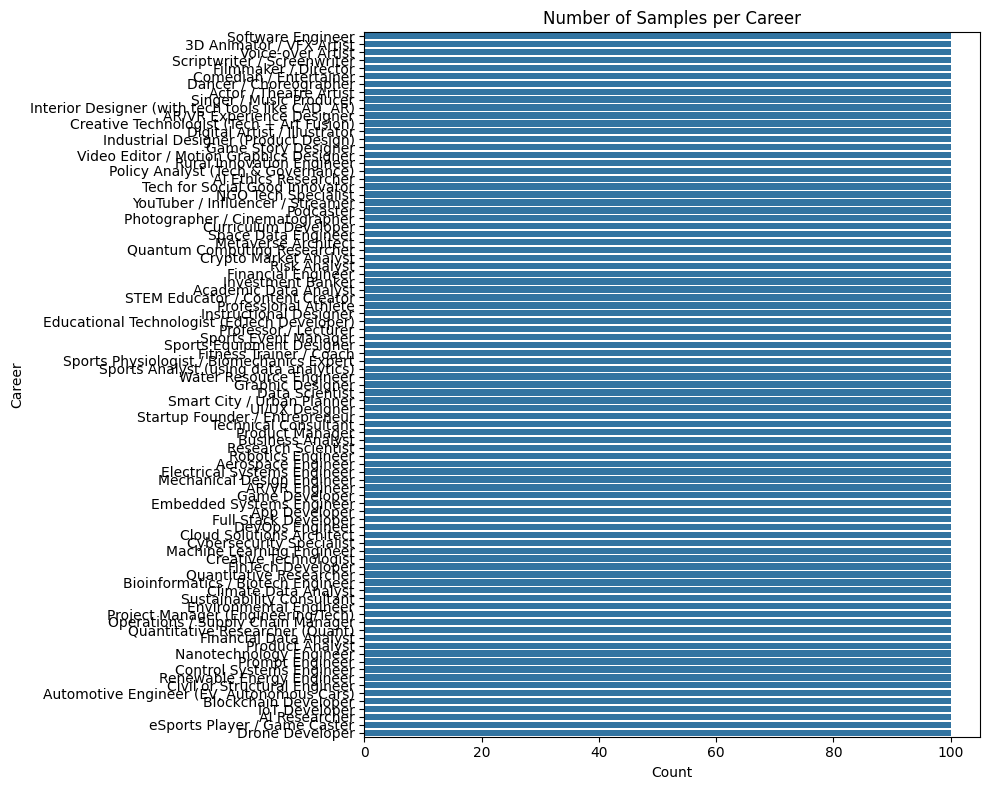

In [4]:
# --- Check Class Distribution ---
# Let's see if we have 100 samples for each career
plt.figure(figsize=(10, 8))
sns.countplot(y='career', data=df, order=df['career'].value_counts().index)
plt.title('Number of Samples per Career')
plt.xlabel('Count')
plt.ylabel('Career')
plt.tight_layout()
plt.show()

C:\Users\Ayush R\AppData\Local\Temp\ipykernel_84660\3433984497.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=career_programming_interest.values, y=career_programming_interest.index, palette='viridis')


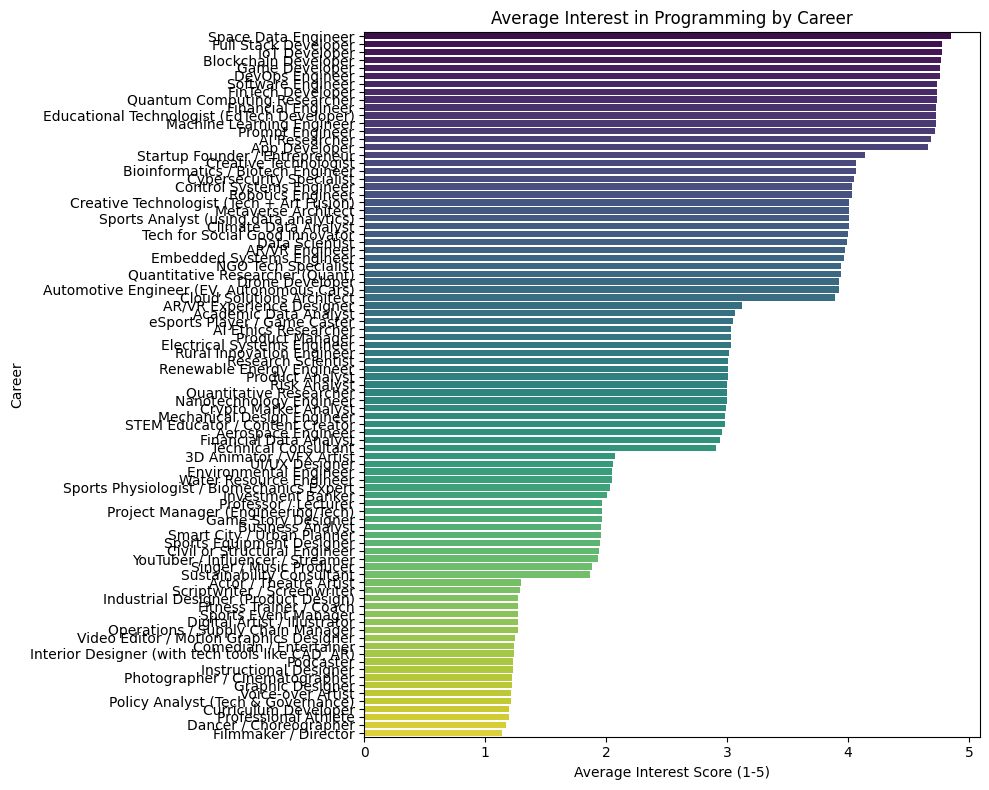

In [5]:
# --- Visualize a Key Pattern ---
# Let's check the average 'interest_programming' score for each career.
# We expect roles like Software Engineer and Game Developer to be high.
plt.figure(figsize=(10, 8))
# Group by career and get the mean, then sort
career_programming_interest = df.groupby('career')['interest_programming'].mean().sort_values(ascending=False)
sns.barplot(x=career_programming_interest.values, y=career_programming_interest.index, palette='viridis')
plt.title('Average Interest in Programming by Career')
plt.xlabel('Average Interest Score (1-5)')
plt.ylabel('Career')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# The dataframe 'df' is already loaded from the previous step

# --- 1. Separate Features (X) and Labels (y) ---
X = df.drop('career', axis=1) # All columns except the 'career' column
y = df['career']             # Only the 'career' column

print("Features (X) shape:", X.shape)
print("Labels (y) shape:", y.shape)

Features (X) shape: (8900, 21)
Labels (y) shape: (8900,)


In [7]:
# --- 2. Encode Text Labels into Numbers ---
# A neural network can't understand "Software Engineer", so we convert it to a number like 22.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# You can see the mapping like this:
# print("\nLabel mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name}: {i}")

3D Animator / VFX Artist: 0
AI Ethics Researcher: 1
AI Researcher: 2
AR/VR Engineer: 3
AR/VR Experience Designer: 4
Academic Data Analyst: 5
Actor / Theatre Artist: 6
Aerospace Engineer: 7
App Developer: 8
Automotive Engineer (EV, Autonomous Cars): 9
Bioinformatics / Biotech Engineer: 10
Blockchain Developer: 11
Business Analyst: 12
Civil or Structural Engineer: 13
Climate Data Analyst: 14
Cloud Solutions Architect: 15
Comedian / Entertainer: 16
Control Systems Engineer: 17
Creative Technologist: 18
Creative Technologist (Tech + Art Fusion): 19
Crypto Market Analyst: 20
Curriculum Developer: 21
Cybersecurity Specialist: 22
Dancer / Choreographer: 23
Data Scientist: 24
DevOps Engineer: 25
Digital Artist / Illustrator: 26
Drone Developer: 27
Educational Technologist (EdTech Developer): 28
Electrical Systems Engineer: 29
Embedded Systems Engineer: 30
Environmental Engineer: 31
Filmmaker / Director: 32
FinTech Developer: 33
Financial Data Analyst: 34
Financial Engineer: 35
Fitness Trainer 

In [8]:
# --- 3. Scale Numerical Features ---
# This standardizes the features (e.g., scales them to have mean=0, stddev=1).
# It's crucial for helping the neural network train efficiently.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- 4. Split Data into Training and Testing Sets ---
# We'll use 80% of the data to train the model, and 20% to test its performance.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,      # 20% of data will be for testing
    random_state=42,    # Ensures the split is the same every time you run
    stratify=y_encoded  # Ensures the class distribution is the same in train and test sets
)

print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (7120, 21)
Testing data shape: (1780, 21)


In [10]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

print("--- Starting Model Retraining ---")

# --- 1. Load the FULL, Expanded Dataset ---
try:
    df = pd.read_csv('career_prediction_dataset.csv')
    print(f"Dataset loaded successfully with {len(df)} rows.")
except FileNotFoundError:
    print("Error: 'career_prediction_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# --- 2. Automatically Determine the Number of Classes ---
num_classes = df['career'].nunique()
print(f"Found {num_classes} unique career classes in the dataset.")


# --- 3. Preprocessing ---
# Separate Features (X) and Labels (y)
X = df.drop('career', axis=1)
y = df['career']

# Encode Text Labels into Numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded # Crucial for imbalanced datasets
)
print("Data preprocessing complete.")
print(f"Training data shape: {X_train.shape}")
print(f"Number of output classes: {num_classes}")


# --- 4. Define the Upgraded Model Architecture ---
model = Sequential([
    # Input Layer
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3), # ADDED: Dropout layer to prevent overfitting

    # Hidden Layer 1
    Dense(128, activation='relu'),
    Dropout(0.3), # ADDED: Another Dropout layer

    # Hidden Layer 2
    Dense(64, activation='relu'),

    # Output Layer: Automatically uses the correct number of neurons
    Dense(num_classes, activation='softmax')
])

# --- 5. Compile the Model ---
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Model Summary ---")
model.summary()


# --- 6. Train the Model ---
print("\n--- Starting Model Training ---")
history = model.fit(
    X_train,
    y_train,
    epochs=60,  # Increased epochs slightly for the larger dataset
    batch_size=32,
    validation_split=0.2
)
print("--- Model Training Finished ---")


# --- 7. Evaluate the New Model ---
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n--- Evaluation on Test Data ---")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


# --- 8. Save the Final, Upgraded Assets ---
print("\n--- Saving final model and transformers ---")
model.save('career_prediction_model.h5')
joblib.dump(scaler, 'scaler.gz')
joblib.dump(label_encoder, 'label_encoder.gz')
print("All files saved successfully. Your application is ready to be used with the new model!")

--- Starting Model Retraining ---
Dataset loaded successfully with 8900 rows.
Found 89 unique career classes in the dataset.
Data preprocessing complete.
Training data shape: (7120, 21)
Number of output classes: 89

--- Model Summary ---


c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 89)             │         5,785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,569 (205.35 KB)

 Trainable params: 52,569 (205.35 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0952 - loss: 4.0047 - val_accuracy: 0.5906 - val_loss: 1.3176
Epoch 2/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 1.3518 - val_accuracy: 0.8596 - val_loss: 0.5587
Epoch 3/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7107 - loss: 0.8450 - val_accuracy: 0.8631 - val_loss: 0.4225
Epoch 4/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7670 - loss: 0.6513 - val_accuracy: 0.8778 - val_loss: 0.3493
Epoch 5/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.5630 - val_accuracy: 0.8764 - val_loss: 0.3365
Epoch 6/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8180 - loss: 0.4955 - val_accuracy: 0.8954 - val_loss: 0.2869
Epoch 7/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8287 - loss: 0.4574 - val_accuracy: 0.9038 - val_loss: 0.2776
Epoch 8/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8427 


--- Evaluation on Test Data ---
Test Accuracy: 91.35%
Test Loss: 0.2209

--- Saving final model and transformers ---
All files saved successfully. Your application is ready to be used with the new model!


In [11]:
# --- Evaluate the model on the test set ---
loss, accuracy = model.evaluate(X_test, y_test)

print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9198 - loss: 0.2078

Test Accuracy: 91.35%
Test Loss: 0.2209


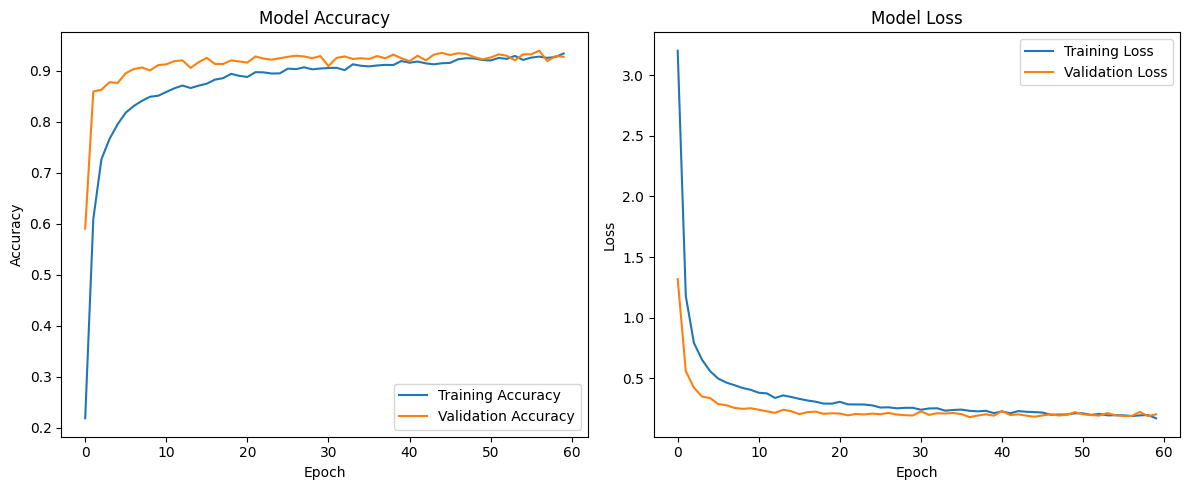

In [12]:
import matplotlib.pyplot as plt

# --- Plot Training & Validation Accuracy ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# --- Plot Training & Validation Loss ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
import joblib
from tensorflow.keras.models import load_model

# --- 1. Save the Trained Model ---
# This saves the model's architecture, weights, and training configuration.
model.save('career_prediction_model.h5')

# --- 2. Save the Scaler ---
# We need this to apply the exact same scaling to new user input.
joblib.dump(scaler, 'scaler.gz')

# --- 3. Save the Label Encoder ---
# We need this to convert the model's numerical output back into a career name.
joblib.dump(label_encoder, 'label_encoder.gz')

print("Model, scaler, and label encoder have been saved successfully!")

Model, scaler, and label encoder have been saved successfully!
